In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('companies.csv')
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


<Axes: >

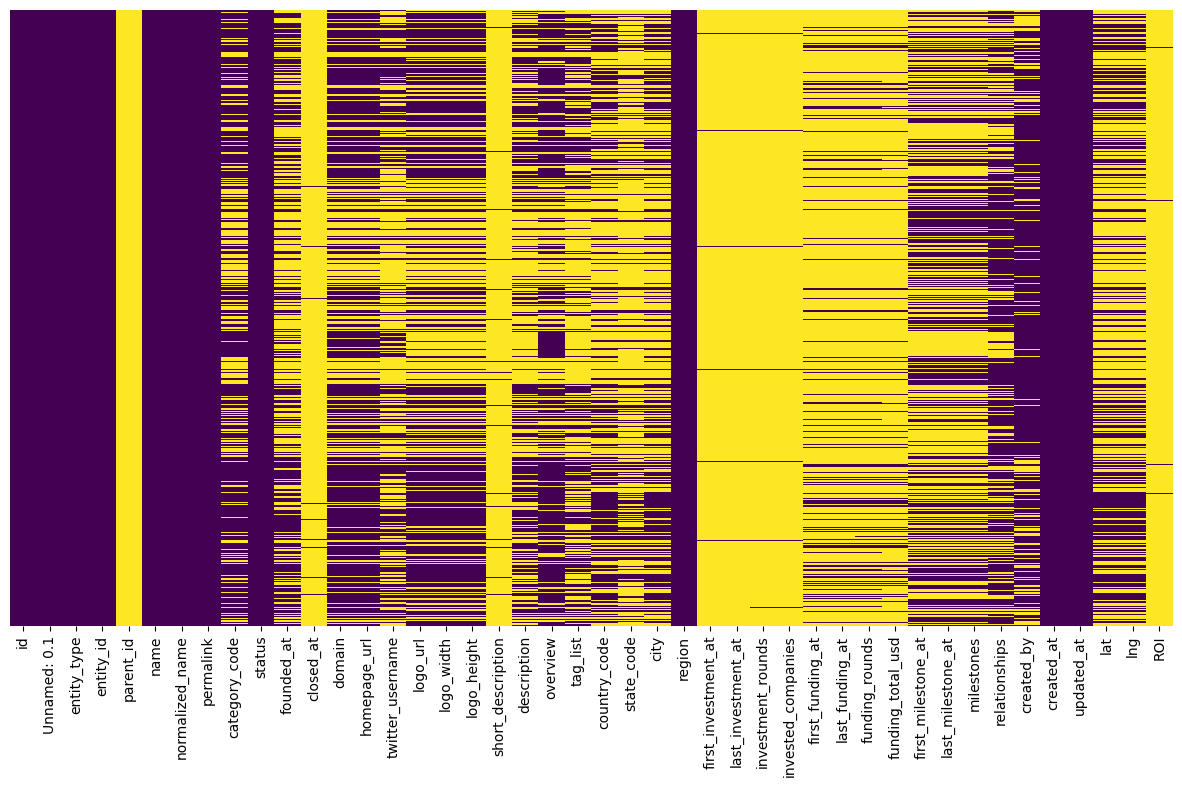

In [3]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(round(missing_percentage, 2))

id                       0.00
Unnamed: 0.1             0.00
entity_type              0.00
entity_id                0.00
parent_id              100.00
name                     0.01
normalized_name          0.01
permalink                0.00
category_code           37.33
status                   0.00
founded_at              53.59
closed_at               98.67
domain                  35.62
homepage_url            35.62
twitter_username        59.00
logo_url                43.98
logo_width              43.98
logo_height             43.98
short_description       96.37
description             53.17
overview                35.40
tag_list                58.56
country_code            55.23
state_code              74.10
city                    57.32
region                   0.00
first_investment_at     98.69
last_investment_at      98.69
investment_rounds       98.68
invested_companies      98.68
first_funding_at        83.97
last_funding_at         83.97
funding_rounds          83.87
funding_to

<Axes: >

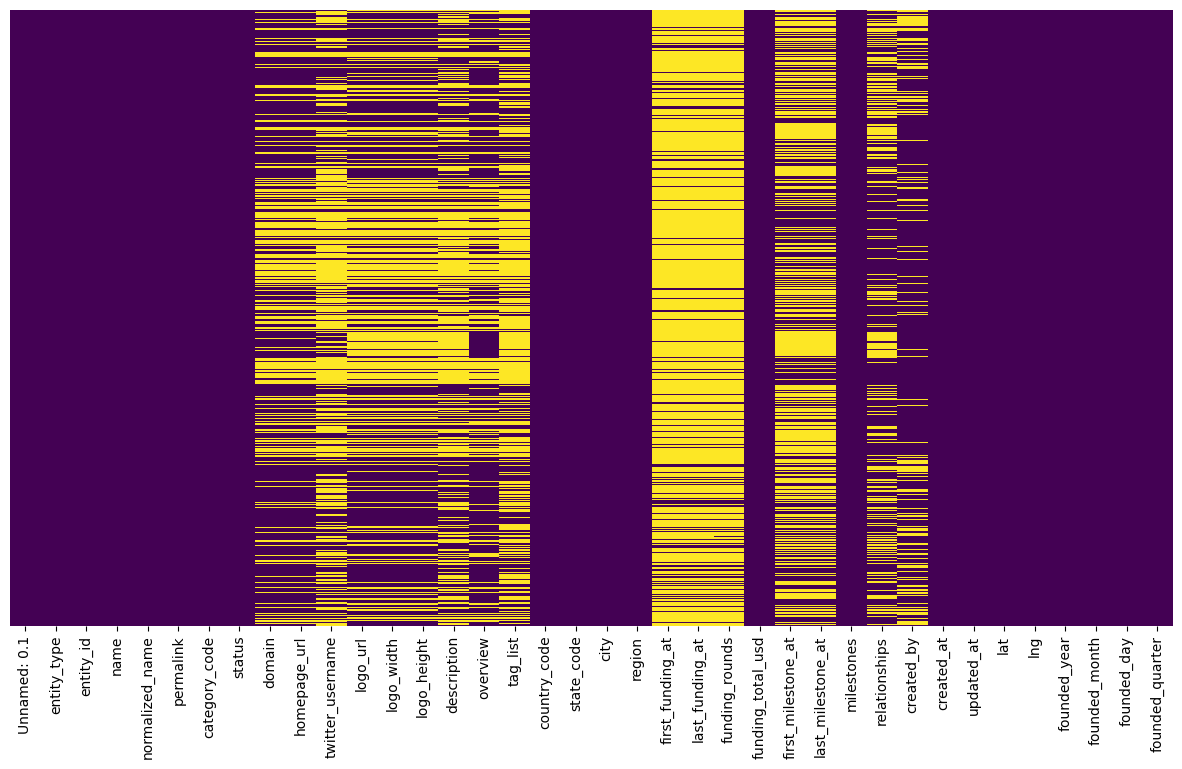

In [5]:
# Dropping columns that have more than 90% missing values

from sklearn.impute import KNNImputer
df.drop(columns=['id', 'parent_id', 'closed_at', 'first_investment_at', 'last_investment_at',
                 'investment_rounds', 'invested_companies', 'ROI', 'short_description'], inplace=True)

# Fill with 'Unknown' if missing values indicate absence of information
df.fillna({'country_code': 'Unknown', 'state_code': 'Unknown',
          'city': 'Unknown'}, inplace=True)
df['category_code'] = df['category_code'].fillna(df['category_code'].mode()[0])

# Treating the numerical columns
df['funding_total_usd'] = df['funding_total_usd'].fillna(
    df['funding_total_usd'].median())
df['milestones'] = df['milestones'].fillna(df['milestones'].median())


imputer = KNNImputer(n_neighbors=5)
df[['lat', 'lng']] = imputer.fit_transform(df[['lat', 'lng']])


df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

df['founded_year'] = df['founded_at'].dt.year
df['founded_month'] = df['founded_at'].dt.month
df['founded_day'] = df['founded_at'].dt.day
df['founded_quarter'] = df['founded_at'].dt.quarter
df.drop(columns=['founded_at'], inplace=True)

df['founded_year'] = df['founded_year'].fillna(df['founded_year'].median())
df['founded_month'] = df['founded_month'].fillna(df['founded_month'].median())
df['founded_day'] = df['founded_day'].fillna(df['founded_day'].median())
df['founded_quarter'] = df['founded_quarter'].fillna(
    df['founded_quarter'].median())

plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')